# Описание проекта #


Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

**У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.**

/datasets/query_1.csv 

В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv 

В нём содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

**Для этих двух наборов данных нужно:**
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats as st

pd.set_option('display.max_columns', 500)

crafts = pd.read_csv('/datasets/query_1.csv')
crafts.sort_values(by='flights_amount', ascending = False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


In [2]:
crafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


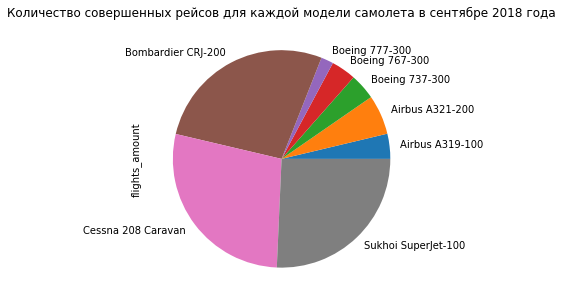

In [3]:
crafts.set_index('model', inplace=True)
crafts.plot(kind = 'pie', y ='flights_amount', figsize = (18, 5), legend = False)
plt.title('Количество совершенных рейсов для каждой модели самолета в сентябре 2018 года');
#plt.show()
#plt.legend(ncol = 1, bbox_to_anchor = (2, 0.8))

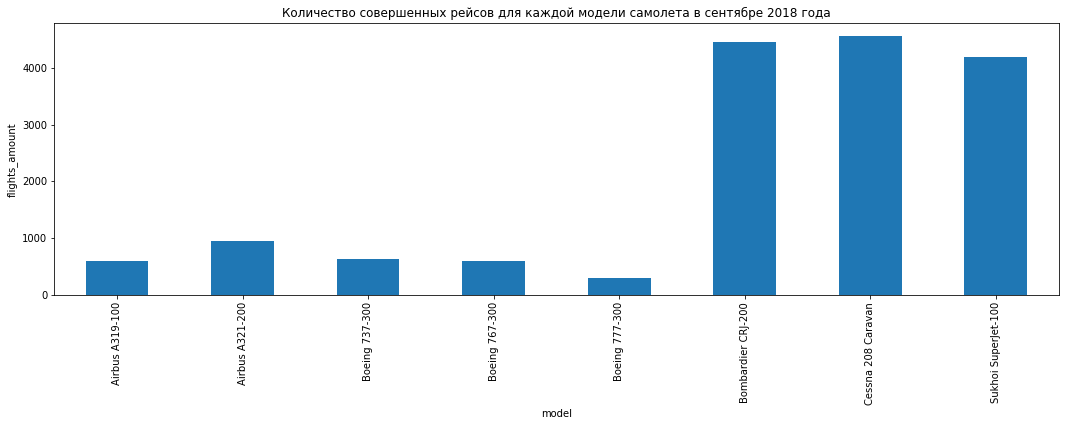

In [4]:
crafts.plot(kind = 'bar', y ='flights_amount', figsize = (18, 5), legend = False)
plt.title('Количество совершенных рейсов для каждой модели самолета в сентябре 2018 года')
plt.ylabel('flights_amount');

In [5]:
head = ['Cessna 208 Caravan', 'Bombardier CRJ-200', 'Sukhoi SuperJet-100', 'Airbus A321-200', 'Boeing 737-300', 'Airbus A319-100', 'Boeing 767-300', 'Boeing 777-300']
data = [13, 50, 98, 220, 149, 156, 330, 550 ]

traffic = pd.DataFrame(columns = ['traffic'], data = data, index = head)

traffic = traffic.join(crafts)
traffic

,traffic,flights_amount
Cessna 208 Caravan,13,4557
Bombardier CRJ-200,50,4446
Sukhoi SuperJet-100,98,4185
Airbus A321-200,220,960
Boeing 737-300,149,630
Airbus A319-100,156,607
Boeing 767-300,330,600
Boeing 777-300,550,300


In [6]:
traffic['total_pass'] = traffic['traffic'] * traffic ['flights_amount']
traffic.sort_values(by ='total_pass', ascending =False)

,traffic,flights_amount,total_pass
Sukhoi SuperJet-100,98,4185,410130
Bombardier CRJ-200,50,4446,222300
Airbus A321-200,220,960,211200
Boeing 767-300,330,600,198000
Boeing 777-300,550,300,165000
Airbus A319-100,156,607,94692
Boeing 737-300,149,630,93870
Cessna 208 Caravan,13,4557,59241


**ВЫВОД:** 

Рейсов самолетов модели типа Sukhoi, Bombardier и Cessa в сентябре было совершено больше всего, более 4000 каждой. Модели Airbus и Boing летает реже. Вероятней всего, парк а\к в большей степени состоит из моделей региональных самолетов, с небольшим количество посадочных мест и дальностью полета (все таки компанию региональная). Тем не менее если рассматривать модели по максимальному пассажиропотоку, то самое большое кол-во пассажиров было перевезено моделью Sukhoi - 410130 пассажиров (если предположить, что все места были проданы). 

In [7]:
"""
import requests
from bs4 import BeautifulSoup
import re

URL = 'https://ru.wikipedia.org/wiki/Bombardier_CRJ200#%D0%A2%D0%B5%D1%85%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8'
bombardier_req = requests.get(URL)
soup = BeautifulSoup(bombardier_req.text, 'lxml')

model = 'CRJ-100/200'

for row in soup.find_all('tr'):
    if 'Пассажировместимость' in row.text:
        for rec in row.text.split('\n'):
            if model in rec:
                print(rec)
                print(re.sub('\({}\)'.format(model), '', rec).strip())
"""

"\nimport requests\nfrom bs4 import BeautifulSoup\nimport re\n\nURL = 'https://ru.wikipedia.org/wiki/Bombardier_CRJ200#%D0%A2%D0%B5%D1%85%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8'\nbombardier_req = requests.get(URL)\nsoup = BeautifulSoup(bombardier_req.text, 'lxml')\n\nmodel = 'CRJ-100/200'\n\nfor row in soup.find_all('tr'):\n    if 'Пассажировместимость' in row.text:\n        for rec in row.text.split('\n'):\n            if model in rec:\n                print(rec)\n                print(re.sub('\\({}\\)'.format(model), '', rec).strip())\n"

In [8]:
flights = pd.read_csv('/datasets/query_3.csv')
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
flights.sample(10)

,city,average_flights
10,Брянск,10.000000
98,Южно-Сахалинск,4.290323
56,Норильск,2.290323
81,Тюмень,6.967742
32,Краснодар,3.903226
47,Нарьян-Мар,2.612903
66,Псков,1.548387
50,Нижневартовск,3.129032
61,Орск,1.590909
89,Уфа,6.290323


In [10]:
flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [11]:
import requests
from bs4 import BeautifulSoup
import re

URL2 = 'http://www.statdata.ru/largest_cities_russia'

req2= requests.get(URL2)
soup2 = BeautifulSoup(req2.text, 'lxml')
 
content = []

for element in soup2.find_all('td', attrs = {'class' : 'sites-layout-tile sites-tile-name-content-1'}):
    for row in element.find_all('tr'): 
        content.append([element.text for element in row.find_all('td')])

data = pd.DataFrame(data = content)

title = data.loc[0]
data = data.drop([0, 1, 4, 5, 6, 7], axis = 1)
data = data.drop(0, axis = 0)
data = data.rename(columns = {2: 'city', 3: 'population'})
print(data.head(20))


                  city             population
1            г. Москва             12 678 079
2   г. Санкт-Петербург              5 398 064
3       г. Новосибирск              1 625 631
4      г. Екатеринбург              1 493 749
5            г. Казань              1 257 391
6   г. Нижний Новгород              1 252 236
7         г. Челябинск              1 196 680
8            г. Самара              1 156 659
9              г. Омск              1 154 507
10   г. Ростов-на-Дону              1 137 904
11              г. Уфа              1 128 787
12       г. Красноярск              1 093 771
13          г. Воронеж              1 058 261
14            г. Пермь              1 055 397
15        г. Волгоград              1 008 998
16              Итого:             33 696 114
17                None                   None
18                None                   None
19               Город  на 1 января 2020 года
20        г. Краснодар                932 629


In [12]:
# удалим пустые строки и строки с "Город" и "Итого", так как собрали съединую несколько таблиц.
data = data.dropna()
data.drop(data[data.city == 'Город'].index, inplace=True)
data.drop(data[data.city == 'Итого:'].index, inplace=True)
print(data.head(20))

                  city  population
1            г. Москва  12 678 079
2   г. Санкт-Петербург   5 398 064
3       г. Новосибирск   1 625 631
4      г. Екатеринбург   1 493 749
5            г. Казань   1 257 391
6   г. Нижний Новгород   1 252 236
7         г. Челябинск   1 196 680
8            г. Самара   1 156 659
9              г. Омск   1 154 507
10   г. Ростов-на-Дону   1 137 904
11              г. Уфа   1 128 787
12       г. Красноярск   1 093 771
13          г. Воронеж   1 058 261
14            г. Пермь   1 055 397
15        г. Волгоград   1 008 998
20        г. Краснодар     932 629
21          г. Саратов     838 042
22           г. Тюмень     807 271
23         г. Тольятти     699 429
24           г. Ижевск     648 146


In [13]:
# уберем лишнее из названия города и преведем к upper регистру

from pymystem3 import Mystem
m = Mystem() 

def change_city(element): 
    lemma = m.lemmatize(element)
    return lemma[2].upper()
        
data['city'] = data['city'].apply(change_city)
#data['population'] = pd.to_numeric(data['population'])

print(data.head())

              city  population
1           МОСКВА  12 678 079
2  САНКТ-ПЕТЕРБУРГ   5 398 064
3      НОВОСИБИРСК   1 625 631
4     ЕКАТЕРИНБУРГ   1 493 749
5           КАЗАНЬ   1 257 391


In [14]:
#удалим пробелы из цифр и преведем к типу данных int
data['population'] = data['population'].apply(lambda x: x.replace(' ', '')).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 1 to 181
Data columns (total 2 columns):
city          173 non-null object
population    173 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [15]:
flights['city'] = flights['city'].str.upper()
flights.head(10)

,city,average_flights
0,АБАКАН,3.870968
1,АНАДЫРЬ,1.000000
2,АНАПА,2.161290
3,АРХАНГЕЛЬСК,5.354839
4,АСТРАХАНЬ,2.451613
5,БАРНАУЛ,2.612903
6,БЕЛГОРОД,6.000000
7,БЕЛОЯРСКИЙ,2.000000
8,БЛАГОВЕЩЕНСК,1.000000
9,БРАТСК,1.000000


In [16]:
# добавим население в таблицу с кол-вом перелотов
flights = flights.merge(data, on = 'city', how = 'left')
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 3 columns):
city               101 non-null object
average_flights    101 non-null float64
population         75 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


In [17]:
flights.set_index('city', inplace=True)
flights.head()

,average_flights,population
city,,
АБАКАН,3.870968,186797.0
АНАДЫРЬ,1.000000,NaN
АНАПА,2.161290,NaN
АРХАНГЕЛЬСК,5.354839,346979.0
АСТРАХАНЬ,2.451613,529793.0


In [18]:
# посчитаем корреляцию
flights.corr()

,average_flights,population
average_flights,1.000000,0.965783
population,0.965783,1.000000


In [19]:
flights_top = flights.sort_values(by='average_flights', ascending = False).head(10)
flights_top

,average_flights,population
city,,
МОСКВА,129.774194,12678079.0
САНКТ-ПЕТЕРБУРГ,31.161290,5398064.0
НОВОСИБИРСК,17.322581,1625631.0
КРАСНОЯРСК,11.580645,1093771.0
ЕКАТЕРИНБУРГ,11.322581,1493749.0
РОСТОВ-НА-ДОНУ,10.193548,1137904.0
ПЕРМЬ,10.129032,1055397.0
БРЯНСК,10.000000,402675.0
СОЧИ,9.612903,443562.0


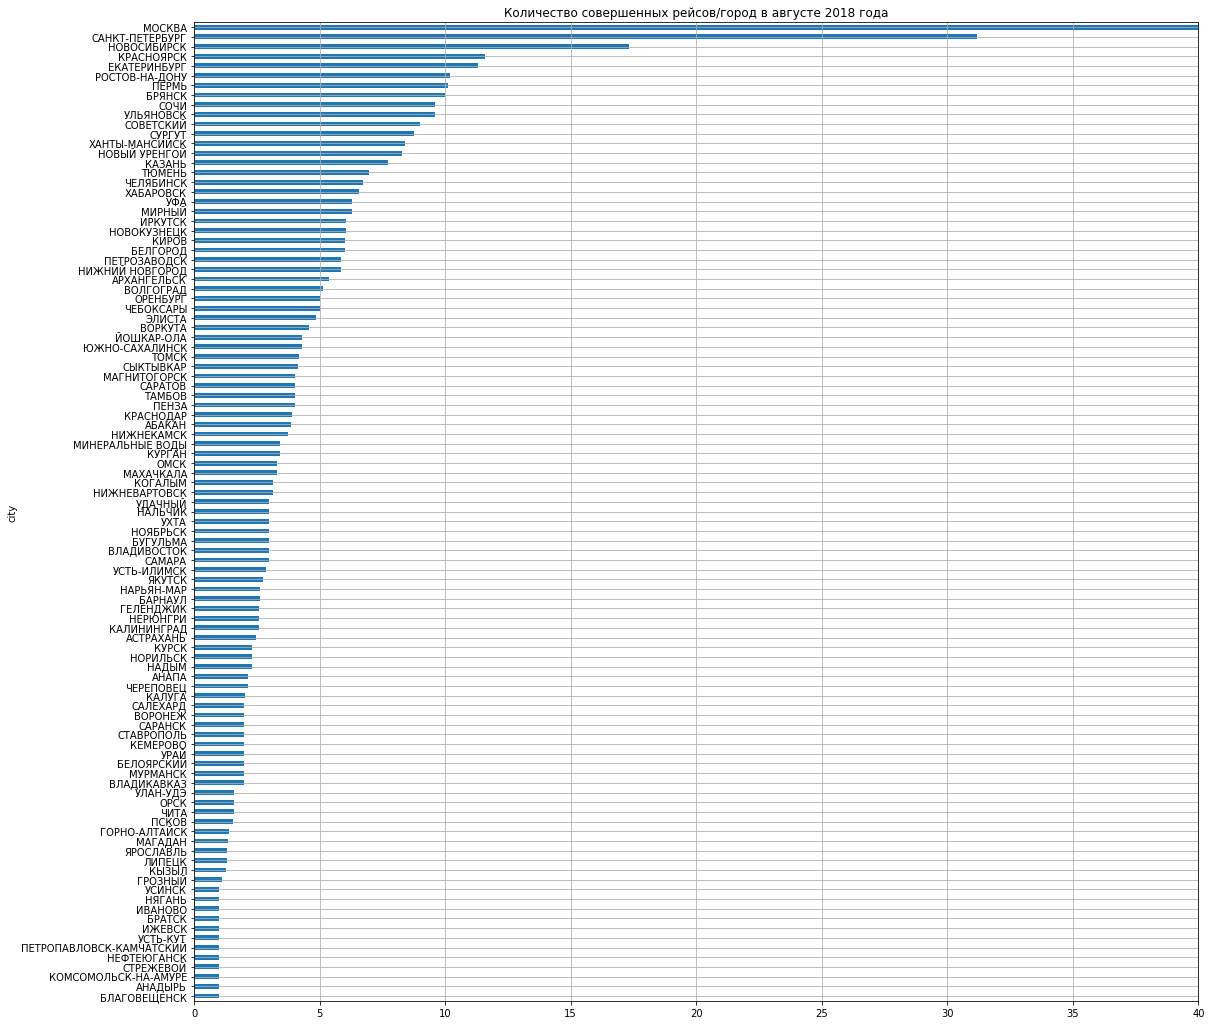

In [20]:
flights.sort_values(by='average_flights').plot(kind = 'barh', y ='average_flights', xlim = (0, 40), grid = True, figsize = (18, 18), legend = False)
plt.title('Количество совершенных рейсов/город в августе 2018 года')
plt.show()


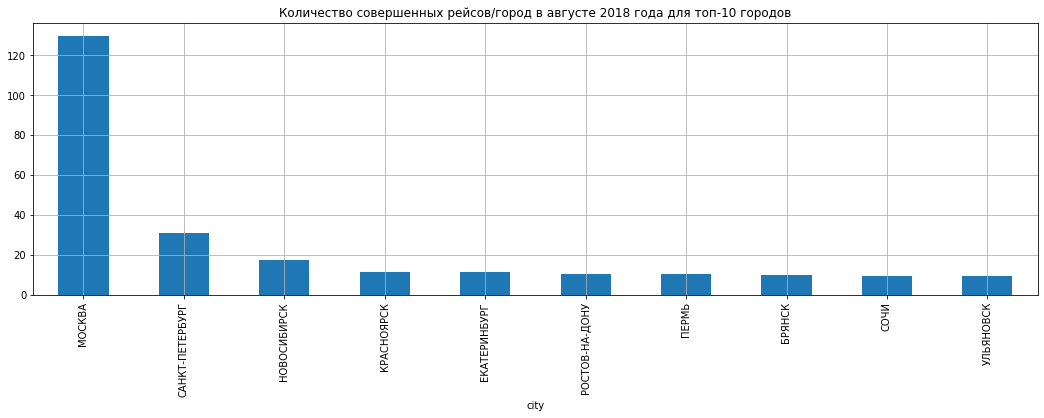

In [21]:
flights_top.sort_values(by='average_flights',ascending = False).plot(kind = 'bar', y ='average_flights', grid = True, figsize = (18, 5), legend = False)
plt.title('Количество совершенных рейсов/город в августе 2018 года для топ-10 городов');

In [22]:
flights.loc['КАЗАНЬ']

average_flights    7.741935e+00
population         1.257391e+06
Name: КАЗАНЬ, dtype: float64

**ВЫВОД:** 

Авиакомания за август месяц совершила рейсы в 131 город РФ. 

Из них самое большое - с прибытием в Москву. Столица как была отдельной страной, так и осталась: в среднем ежедневно сюда прибывает более 129 рейсов (за август). 

На втором месте Санкт-Петербург с 31 рейсов/день, на третьем - Новосибирск с 17 рейсов/день. 

В остальные города России прилетает до 10 рейсов в день. Здесь стоит отметить, Казань и Нижний Новгород не вошли в список топ-10 городов, хотя занимают 5 и 6 места соответсвенно по плотности населения в России, когда как Брянск и Ульяновск не входят даже в топ-10, но вошли в топ-10 по количеству совершаемых рейсов в день. Тем не менне можно однозначно сделать вывод, что чем больше население города, тем больше кол-ва рейсов туда летают: корреляция между показателями составляет 0.96.


Если говорить про модельный ряд, очень сильно выбиваются модели Cessna 208 Caravan 4557, Bombardier CRJ-200, Sukhoi SuperJet -100. В сентябре 2018 было совершенно более 4000 рейсов кажой модели. Рейсов самолетов марок Boing и Airbus совершается гораздо меньше, и здесь самая пупулярна Airbus A321-200 с 960 рейсов за сентябрь месяц. Здесь можно предположить, что парк а/к состоит преимуществено из моделей самолетов Cessnа, Bombardier, Sukhoi - региональных самолетов с дальностью полета 1982, в 3713 и 3048 км соответсвенно. 
